# Feature Selection metodlari

<b>Feature Selection</b> nima va u nima maqsadda ishlatiladi degan savolga bugun biz 12 ta metodni 3 ta kategoriyaga bo'lgan holda o'rganib chiqamiz. Biz ba'zi muammolarni yechishda model quramiz va model natijasiga bizning datadagi qaysi bir ustun(feature)i ko'proq tasir qilishini bilishimiz uchun biz datadagi ustunlar sonini kamaytirib faqatgaina natijaga tasir qilayotgan eng muhimlarini tanlab olishimiz kerak.

Feature Selectionning asosiy vazifalari
* Target value bilan orasidagi bog'liqlik maksimum bo'lgan featurelarni saqlab qoladi va qolganlarini o'chirib yuvoradi.
* Train va Test classifierdagi hisoblash murakkabligi va hisoblash vaqtini kamaytiradi va natijasi <i>cost-effective</i> model hosil qiladi
* [Overfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/)ni oldini olgan holda learning algoritmni modelini yaxshilaydi

## Feature Selectionning 3 ta turi

Klassifikatsiya(Classifier) masalasiga qanday bog'langanligiga qarab feature selection metodi 3 ta kategoriyaga bo'linadi.
* Filter
* Wrapper
* Embedded

## Filter Metodlar

Klassifikatsiya qilinmasdan oldin learning algoritm [bias](https://www.bmc.com/blogs/bias-variance-machine-learning/#:~:text=What%20is%20bias%20in%20machine,assumptions%20in%20the%20ML%20process.)i bilan feature selection algoritimni biasi aralashib ketmasligini uchun feature selectionni tanlab oladi.<br> Ular asosan ranker sifatida qaraladi va featurelarini yaxshisidan yomoniga qarab tartiblaydi. 
<br>
Featurelaring ranki dataning <i>muhumlilik xususiyatiga(intrinsic properties)</i> bog'liq, misol uchun dispersiya, [consistency](https://en.wikipedia.org/wiki/Data_consistency), masofa va koorelatsiya.
<br>
Hozirgi paytda juda ko'p filter metodlari mavjud va yangilari ham regualarniy ishab chiqarilmoqda.
<br>



## Wrapper Metodlar

Wrapper metodi mechine learining algoritmlarini <i>qora quti (black box evaluator)</i> orqali eng yaxshi featurelaring qisim toplamini topishda ishlatiladi.
<br>
Amaliyotda bazi qidirish strategiyalari va algoritmlarni modellashtirishning kombinatsiyalari wrapper sifatida ishalatiladi.
<br>
Qachonki ko'p featureli katta dadaset bilan ishalganda u juda ko'p hisoblash resursini va vaqtini talab qiladi va wrapper metodlari orqali hisoblashini soddalashtirsak bo'ladi.

## Embedded Metodlar

Embedded metodlar filter va wrapper metodalar orasidagi ko'prik vazifasini bajarib beradi.
<br>
Statsitik kriteryalar orqali bazi featurelarni tanlab oladi va machine learning algoritmlarini orqali eng yaxshi kalssifikatsiyali natijalarni tanlab oladi.
<br>
Har bir itaratsiyada featurelar qisimtoplamini qayta sinflamasdan wrapper metodining hisoblanish murkkabligini kamaytiradi va modelni featurega bog'loqlik qilib qo'yadi.
<br>
Feature selection learning phase(model qurilish vaqti)da amalga oshiriladi yani u model fitting  va feature selectionni bir vaqting o'zida amalga oshiriladi.
<br>
Bitta minus tarafi tanlab olish klasslarga bog'liq

Kerakli kutubxonalarni qo'shamiz va hisoblash ishlarini boshlaymiz

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
# Read in data into a dataframe 
data = pd.read_excel('Data1_Feature_selection.xlsx')
# Display top of dataframe
data.head()

,ID,BEq(cr),C1_me,C2_bs,MAC1(Mw),MAC1(HP),MAC1(IP),MAC1(ECI),MAC1(Vm),MAC1(Anp),...,MAC7(Z1),MAC7(Z2),MAC7(Z3),MAC7(ISA),MAC7(At),MAC7(Ap),MAC7(Pa),MAC7(Pb),MAC7(Pt),Set
0,1,-1,MIC (uM),Escherichia coli,18766.50,3.16,77.31,0.28,29700.05,19965.60,...,-2.21,2.66,-0.65,9625.47,25264.62,1374.12,1.48,1.39,0.97,Train
1,2,1,MIC (uM),Escherichia coli,22420.21,-4.44,99.13,0.42,32496.79,16664.04,...,3.12,-1.06,1.74,8169.21,39940.07,6203.67,1.57,1.60,1.62,Train
2,3,-1,HC50 (uM),Human erythrocytes,27623.55,5.11,91.88,0.49,44321.25,28677.85,...,7.54,-2.37,1.26,13886.31,29654.90,2433.19,1.40,1.24,0.73,Train
3,4,1,MIC (uM),Salmonella enterica subsp. enterica serovar Ty...,29326.84,-4.77,98.67,0.31,48094.77,30257.87,...,9.14,1.58,2.09,17344.28,43139.05,4670.11,1.65,1.30,0.85,Train
4,5,1,MIC (uM),Escherichia coli,29443.58,-0.25,94.84,0.66,46870.09,28039.24,...,5.41,1.73,1.84,14534.03,42398.55,5022.12,1.64,1.22,0.92,Train


Bazi ustunalar bizga kerak emas va ularni o'chirib tashlaymiz

In [3]:
X = data.drop(columns =['ID','BEq(cr)','C1_me','C2_bs','Set'])
X

,MAC1(Mw),MAC1(HP),MAC1(IP),MAC1(ECI),MAC1(Vm),MAC1(Anp),MAC1(Z1),MAC1(Z2),MAC1(Z3),MAC1(ISA),...,MAC7(Anp),MAC7(Z1),MAC7(Z2),MAC7(Z3),MAC7(ISA),MAC7(At),MAC7(Ap),MAC7(Pa),MAC7(Pb),MAC7(Pt)
0,18766.50,3.16,77.31,0.28,29700.05,19965.60,3.76,3.30,0.76,15053.39,...,13511.82,-2.21,2.66,-0.65,9625.47,25264.62,1374.12,1.48,1.39,0.97
1,22420.21,-4.44,99.13,0.42,32496.79,16664.04,1.44,-2.59,1.15,9813.25,...,14177.47,3.12,-1.06,1.74,8169.21,39940.07,6203.67,1.57,1.60,1.62
2,27623.55,5.11,91.88,0.49,44321.25,28677.85,1.74,1.82,2.43,22188.24,...,16639.72,7.54,-2.37,1.26,13886.31,29654.90,2433.19,1.40,1.24,0.73
3,29326.84,-4.77,98.67,0.31,48094.77,30257.87,-4.08,-1.10,3.55,22535.35,...,21541.75,9.14,1.58,2.09,17344.28,43139.05,4670.11,1.65,1.30,0.85
4,29443.58,-0.25,94.84,0.66,46870.09,28039.24,1.36,-1.21,3.08,20183.11,...,19492.40,5.41,1.73,1.84,14534.03,42398.55,5022.12,1.64,1.22,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21393.83,-4.59,82.69,0.24,33665.40,20664.90,-4.11,1.93,0.29,12921.03,...,17926.88,0.02,4.13,0.45,11660.37,38477.93,3967.51,1.68,1.76,1.57
96,22452.96,-4.45,85.24,0.27,34963.22,21181.17,-3.06,1.12,0.95,13371.76,...,19061.72,1.23,2.40,1.15,12599.22,40367.01,4275.58,1.71,1.84,1.54
97,19829.20,0.65,90.09,0.15,30763.30,20289.06,-2.81,6.40,0.12,12336.33,...,16519.71,4.67,4.70,0.03,11615.95,31043.48,2607.85,1.65,1.64,1.70
98,25790.01,-1.94,94.54,0.22,41330.55,28753.67,-0.13,-0.45,0.64,20896.43,...,19421.73,-2.08,1.30,0.78,12649.15,39358.34,3029.84,1.68,1.63,1.33


In [4]:
y = data['BEq(cr)']
y

0    -1
1     1
2    -1
3     1
4     1
     ..
95    1
96    1
97   -1
98    1
99   -1
Name: BEq(cr), Length: 100, dtype: int64

Datasetni ikkiga bo'lib oldik Features va Target qismlarga.

Bu funksiya bizga eng yaxshi ya'ni targetga eng ko'p tasir ko'rsatayotgan featurelarni ko'rsatadi.

In [5]:
def getFeature(mask):
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, X.columns):
        if bool:
            new_features.append(feature)
            
    return new_features

In [6]:
def myModel(myX,myY,X_test):
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(myX,myY)

    # get predict
    y_pred=logreg.predict(X_test)
    
    return y_pred
   

## Filter methods

### 1. Chi-square

Hosil bo'lgan feature klass qiyamtiga tegishli bo'lmasiligni taxmin qiladigan [divergensiya](https://en.wikipedia.org/wiki/Divergence_(statistics)#:~:text=In%20statistics%20and%20information%20geometry,another%20on%20a%20statistical%20manifold.) qiymatini hisoblaydigan χ² statistik testga asoslangan bir o'lchovli filter.
<br>
Boshqa bir o'chovli metodlarga o'xshab biz har bir feature bilan target orasidagi  χ²ni hisoblaymiz va ular orasidagi bog'liqlikni kuzatamiz.
<br>
Agar target qiymati ozod had bo'lsa yani featurelarga bog'liq bo'lmasa natija past qiymat chiqaradi va aksincha bog'liq bo'lsa featurelarning muhimligi oshadi.
<br>
χ² ning yuqori qiymati o'sha featureni targetga juda yaqinligini anglatadi.

In [7]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X_norm, y)
chi_features = getFeature(chi_selector.get_support())
chi_features

['MAC3(Ap)', 'MAC4(ECI)', 'MAC4(Ap)', 'MAC5(Ap)', 'MAC6(Ap)', 'MAC7(Ap)']

Biz target qiymatga juda ko'p tasir ko'rsatyotgan eng yaxshi 6 ta featureni tanlab oldik.
<br>
χ² yordamida featurelarni tanlab olish haqida ko'proq [ma'lumot.](https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223#:~:text=In%20feature%20selection%2C%20we%20aim,hypothesis%20of%20independence%20is%20incorrect.)

In [9]:
from sklearn.model_selection import train_test_split
# import the class
from sklearn.linear_model import LogisticRegression

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X_chi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
chi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.88
Precision: 0.8
Recall: 0.8888888888888888


### 2. Mutual Information

Bu metod ham filter metodlaridan biri va uni [Information Gain](https://machinelearningmastery.com/information-gain-and-mutual-information/#:~:text=Information%20gain%20can%20also%20be,between%20the%20two%20random%20variables.) deb ham atashadi.
<br>
Bu metodning hisoblash tezligi juda yaxshi va formulasi oddiy shuning uchun u ko'p qo'llaniladigan bir o'lchovli feature selection metodlaridan biri hisoblanadi.
<br>
Bir vaqtining o'zida har bir featurening [entopiyasi](https://www.analyticsvidhya.com/blog/2020/11/entropy-a-key-concept-for-all-data-science-beginners/) pasayishini hisoblaydi.
<br>
Agar featurening hisoblangan <i>information gain</i>ning qiymati katta bo'lsa targetga shuncha bog'liq bo'ladi.
<br>
Bu metod muhim bo'lmagan featurelarni ishlatmaydi chunki featurelar bir o'lchovli yo'l bilan aniqlanadi.
<br>
Featurelarning kanteksini hisobga olmasadan ularni erkli(independently) deb baholash metodiga asoslangan va u <b>myopic</b> deb nomlanadi.

In [11]:
from sklearn.feature_selection import mutual_info_classif
mi_selector = SelectKBest(mutual_info_classif, k=6)
mi_selector.fit(X, y)
mi_feature = getFeature(mi_selector.get_support())
mi_feature

['MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC5(Ap)', 'MAC6(Mw)', 'MAC6(Ap)']

Va natijada biz eng yaxshi 6 ta featureni <b> Mutual Information</b> metodi orqali topdik. Bu metod haqida [batafsil ma'lumot.](https://machinelearningmastery.com/information-gain-and-mutual-information/#:~:text=Information%20gain%20can%20also%20be,between%20the%20two%20random%20variables.) 

In [12]:
X_mi = X[mi_feature]
X_train,X_test,y_train,y_test=train_test_split(X_mi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
mi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.76
Precision: 0.6666666666666666
Recall: 0.6666666666666666


### 3. Anova F-value

ANOVA(Analysis of Variance) -statistik metod va u 2 va undan ortiq gruxlarning o'rtacha qiymatining bir biridan farqli ekanligini tekshiraidagan metod.Bu metod ham bir o'lchovli filter metodi hisoblanadi va  klaslar orasidagi individual featurelarning ajralib turishini dispersiyadan foydalanilgan holda hisoblaydi.
<br>


In [13]:
#3 Anova F-value
from sklearn.feature_selection import f_classif
anov_selector = SelectKBest(f_classif, k=6)
anov_selector.fit(X, y)
anova_feature = getFeature(anov_selector.get_support())
anova_feature

['MAC4(IP)', 'MAC4(Ap)', 'MAC5(IP)', 'MAC5(At)', 'MAC5(Ap)', 'MAC7(Ap)']

Bu metod haqida [batafsil ma'lumot](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476)

In [14]:
X_anova = X[anova_feature]
X_train,X_test,y_train,y_test=train_test_split(X_anova,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
anova_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.7
Recall: 0.7777777777777778


### 4. Variance Threshold

Variance Threshold feature selection uchun oddiy yechim hisoblanadi. Ishlash davomida har bir feature uchun dispersiya hisoblanadi va u berilgan qiymat(threshold)dan kichik bo'lsa o'sha featrure o'chiriladi. Bu metodda faqat dispersiya hisoblanadi yani featurelarning bir birga bo'lgan bog'liqligi va featurening target qiymatiga bog'liqligi hisoblanmaydi. Bu filter metodining minus tarafi hisoblandi.

In [20]:
#4 Variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_selector = VarianceThreshold(threshold=1)
var_selector.fit_transform(X)
var_feature = getFeature(var_selector.get_support())
len(var_feature)

77

Bu metod haqida [batafsil ma'lumot](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/#:~:text=The%20variance%20threshold%20is%20a,same%20value%20in%20all%20samples.)

In [24]:
X_thresh = X[var_feature]
X_train,X_test,y_train,y_test=train_test_split(X_thresh,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
thresh_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.5714285714285714
Recall: 0.8888888888888888


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 5. Fisher Score

Fisher Score supervised turdagi datalar bilan ishlaganda eng yaxshi metodlardan biri hisoblanadi va o'rtacha qiymat va dispersiyadan foydalangan holda featurelar rankini hisoblaydi. Featurelar bir hil qiymatli egezemplyarlar bilan bir hil klaslarda va turli hil qiymatli egzemplyarlardan bilan turli hil klaslarda eng yaxshi hisoblanadi. Boshqa bir o'lchovli metodlar singari bu metod ham featurelarni induvidual tarzda baholaydi va targetga tasiri past qiymatlarni natija sifatida ishlatmaydi.

In [15]:
#5. Fisher Score
from skfeature.function.similarity_based import fisher_score
score = fisher_score.fisher_score(X.to_numpy(), y.to_numpy())
X.columns[score[:6]]

Index(['MAC4(ECI)', 'MAC3(Pa)', 'MAC3(ECI)', 'MAC3(Vm)', 'MAC1(ECI)',
       'MAC4(Pa)'],
      dtype='object')

In [16]:
X_fisher = X[X.columns[score[:6]]]
X_train,X_test,y_train,y_test=train_test_split(X_fisher,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
fisher_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.64
Precision: 0.0
Recall: 0.0


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. MultiSURF

MultiSURF metodi [relief](https://medium.com/@yashdagli98/feature-selection-using-relief-algorithms-with-python-example-3c2006e18f83) metodinging kengaytirilgan usuli hisoblandi va uning multi-classi ReliefF filter feature selection metodi orqali hisoblanadi. 
<br>
Orginal relief metodi namunalrni datasetdan tasodifiy tarzda oladi va bir hil va turli hil klaslarga eng yaqin bo'lgan qo'shnisiga joylashtiradi.
<br>
Har bir atribut uchun eng yaqin qo'shini atributi qiymati bilan namuna qilib olingan atributni qiymati bog'liqlilik natijasini yangilash uchun solishtiriladi.
<br>
Asosiy ma'no shundaki ya'ni foydali atribut har hil klaslar namunlarida bir biridan farq qilib turish kerak va bir hil klasslarda bir hil qiymatga ega bo'lishi kerak.
<br>
Boshqa relief metodlarga qaraganda MultiSURF eng bog'liqli feature selection qiymatlarini muammo turlarining doirasiga qarab hosil qiladi.

In [26]:
#6. MultiSURF
from skrebate import MultiSURF
fs = MultiSURF(n_jobs=-1, n_features_to_select=X.columns)
fs.fit(X.values, y.values)
fs

MultiSURF(n_features_to_select=Index(['MAC1(Mw)', 'MAC1(HP)', 'MAC1(IP)', 'MAC1(ECI)', 'MAC1(Vm)',
       'MAC1(Anp)', 'MAC1(Z1)', 'MAC1(Z2)', 'MAC1(Z3)', 'MAC1(ISA)',
       ...
       'MAC7(Anp)', 'MAC7(Z1)', 'MAC7(Z2)', 'MAC7(Z3)', 'MAC7(ISA)',
       'MAC7(At)', 'MAC7(Ap)', 'MAC7(Pa)', 'MAC7(Pb)', 'MAC7(Pt)'],
      dtype='object', length=105),
          n_jobs=-1)

In [27]:
X_multi = X[X.columns]
X_train,X_test,y_train,y_test=train_test_split(X_multi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
multi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.5714285714285714
Recall: 0.8888888888888888


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Wrapper Methods

### 7. Recursive Feature Elimination

Modelni iterativ tarzda train qiladigan va har safar muhimlilik ko'rsatkichi eng kam bo'lgan featureni o'chirib tashlaydi va algoritm vaznini kriteriya sifatida ishlatadigan keng tarqalgan metodlardan [biri](https://machinelearningmastery.com/rfe-feature-selection-in-python/) hisoblanadi.
<br>
Bu ko'p faktorli metod bo'lgani uchun bir nechta featurelarning bog'liqligini bir vaqtning o'zida tekshiradi.
<br>
Barcha featurelar tekshirilmagunicha har bir iteratsiyada bittadan feature ochiriladi va stekga joylashtiriladi.
<br>
Hisoblash effektivligini oshirish maqsadida har bir qadamda bittadan oriq featureni o'chirib tashlashimiz mumkin.
<br>
Bu metod hisoblash tezligi yaxshi emas.

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), 
                   n_features_to_select=6, step=1, verbose=-1)
rfe_selector.fit(X_norm, y)
rfe_feature = getFeature(rfe_selector.get_support())
rfe_feature

['MAC3(IP)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(IP)', 'MAC5(Ap)', 'MAC7(At)']

In [29]:
X_rec = X[rfe_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rec,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
rec_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.92
Precision: 0.8888888888888888
Recall: 0.8888888888888888


### 8. Permutation Importance

Permutation Importance - model natijasini kamayishini bitta featureni tasodifiy olish orqali aniqlanadi.
<br>
Bu pretsedura feature va target orasidagi aloqni buzadi ya'ni model baholanishi qiymati pasayishi modelni featurelarga bog'liqligini ko'rsatadi.
<br>
Bu jarayonda kuzatiloyotgan muhimlik p-value

In [30]:
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
perm = PermutationImportance(LogisticRegression(solver='lbfgs', max_iter=10000), random_state=42, cv=10)
perm.fit(X, y)
perm_selector = SelectFromModel(perm,max_features=6).fit(X, y)
perm_feature = getFeature(perm_selector.get_support())
perm_feature

Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error


['MAC3(At)', 'MAC3(Ap)', 'MAC4(Ap)', 'MAC5(At)', 'MAC7(Mw)', 'MAC7(Vm)']

Batafsil [ma'lumot](https://stackoverflow.com/questions/71417212/eli5-sklearn-permutationimportance-typeerror-check-cv-takes-from-0-to-2)

In [31]:
X_perm = X[perm_feature]
X_train,X_test,y_train,y_test=train_test_split(X_perm,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
perm_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.84
Precision: 0.8571428571428571
Recall: 0.6666666666666666


### 9. SHAP

SHAP - bu har qanday machine learning modelini tushinitra oladigan yagona(унифицированный) yondoshuv. 
<br>
U lokal tushunchalar bilan o'yin nazaryasiga bog'langan, birqancha oldingi metodlarni birlashtirish va bo'lish mumkin bo'lgan hollarni qaytako'rsatish va taxminlarga asoslangan lokal aniq qo'shimcha feature usuli.
<br>
Songi yilllarda bu metod eng ko'p ishlatiladigan metodlardan hisobalnadi.

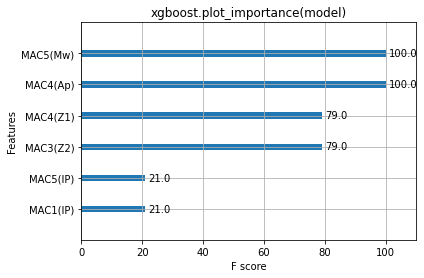

In [17]:
import shap
import xgboost
import matplotlib.pylab as pl
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [18]:
X_shap = X[['MAC5(Mw)', 'MAC4(Ap)', 'MAC4(Z1)', 'MAC3(Z2)', 'MAC5(IP)', 'MAC1(IP)']]
X_train,X_test,y_train,y_test=train_test_split(X_shap,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
shap_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.92
Precision: 0.8888888888888888
Recall: 0.8888888888888888


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 10. Boruta

Bu algoritm Random Forestga asoslangan wrapper algoritimi hisoblandi.
<br>
U statistik test qiymati random probesdan kam bog'liqlik bo'lgan featurelarni itertativ tarzda o'chiradi.

In [32]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=6)
boru_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)
boru_selector.fit(X.values, y.values)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6,
                                          n_estimators=145, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1A42B413840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1A42B413840)

In [34]:
accept = X.columns[boru_selector.support_].to_list()
#accept

In [35]:
X_boruta = X[accept]
X_train,X_test,y_train,y_test=train_test_split(X_boruta,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
boruta_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.88
Precision: 0.8
Recall: 0.8888888888888888


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


link for more [info](https://towardsdatascience.com/feature-selection-with-borutapy-f0ea84c9366)

### 11. Embedded Random Forest

[Bu](https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f) embedded feature selection Random Forest algoritmdan foydalanadi. 
<br>
Random Forestda har bir daraxt barcha featurelarni yoku barcha kuzatuchilarni ko'rmasligi mumkin va bu overfitting bo'lishini kamaytiradi va de-koorelatsiya bo'lishini taminlaydi. 
<br>
Har bir nodeda data 2 ga bo'linadi. bir biriga o'xshash va bir biriga o'xshash bo'lmagan qismlarga.
<br>
Featurening muhimligi o'sha bo'laklarga qanchalik bog'liqligiga asoslanadi.

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=6)
embeded_rf_selector.fit(X, y)
embeded_rf_feature = getFeature(embeded_rf_selector.get_support())
embeded_rf_feature

['MAC3(Ap)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC6(Ap)', 'MAC7(At)']

In [37]:
X_rf = X[embeded_rf_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rf,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
rf_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.75
Recall: 0.6666666666666666


### 12. Embedded LightGBM

Bu embedded feature selection LGB algoritmdan foydalanadi.

In [38]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05,
                    num_leaves=32, colsample_bytree=0.2,                                           
                    reg_alpha=3, reg_lambda=1, min_split_gain=0.01,    
                    min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=6)
embeded_lgb_selector.fit(X, y)
embeded_lgb_feature = getFeature(embeded_lgb_selector.get_support())
embeded_lgb_feature

['MAC1(Mw)', 'MAC1(HP)', 'MAC1(IP)', 'MAC1(ECI)', 'MAC1(Vm)', 'MAC1(Anp)']

In [40]:
X_lgbm = X[embeded_lgb_feature]
X_train,X_test,y_train,y_test=train_test_split(X_lgbm,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
lgbm_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.625
Recall: 0.5555555555555556


In [43]:
chi_table = ['Chi-square', chi_acc, 'MAC3(Ap)', 'MAC4(ECI)', 'MAC4(Ap)', 'MAC5(Ap)', 'MAC6(Ap)', 'MAC7(Ap)' ]
mi_table = ['Mutual Information', mi_acc, 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC5(Ap)', 'MAC6(Mw)', 'MAC6(Ap)']
anova_table = ['Anova F-value', anova_acc, 'MAC4(IP)', 'MAC4(Ap)', 'MAC5(IP)', 'MAC5(At)', 'MAC5(Ap)', 'MAC7(Ap)']
var_table = ['Variance Threshold',thresh_acc,'-','-','-','-','-','-']
fisher_table = ['Fisher Score', fisher_acc, 'MAC4(ECI)', 'MAC3(Pa)', 'MAC3(ECI)', 'MAC3(Vm)', 'MAC1(ECI)','MAC4(Pa)']
multi_table = ['MultiSURF',multi_acc,'-','-','-','-','-','-']
rec_table = ['Recursive Feature Elimination',rec_acc, 'MAC3(IP)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(IP)', 'MAC5(Ap)', 'MAC7(At)']
perm_table = ['Permutation Importance',perm_acc,'MAC3(At)', 'MAC3(Ap)', 'MAC4(Ap)', 'MAC5(At)', 'MAC7(Mw)', 'MAC7(Vm)']
shap_table = ['SHAP', shap_acc, 'MAC5(Mw)', 'MAC4(Ap)', 'MAC4(Z1)', 'MAC3(Z2)', 'MAC5(IP)', 'MAC1(IP)']
boruta_table = ['Boruta',boruta_acc,'-','-','-','-','-','-']
rf_table = ['Embedded Random Forest', rf_acc,'MAC3(Ap)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC6(Ap)', 'MAC7(At)']
lgbm_table =['Embedded LightGBM', lgbm_acc, 'MAC1(Mw)', 'MAC1(HP)', 'MAC1(IP)', 'MAC1(ECI)', 'MAC1(Vm)', 'MAC1(Anp)']




In [45]:
myTable = [chi_table, mi_table, anova_table,var_table, fisher_table, multi_table, rec_table, perm_table, shap_table,
          boruta_table, rf_table, lgbm_table]




In [46]:
results = pd.DataFrame(myTable,columns=['Method', 'Accuracy','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6'])

results                    

,Method,Accuracy,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.88,MAC3(Ap),MAC4(ECI),MAC4(Ap),MAC5(Ap),MAC6(Ap),MAC7(Ap)
1,Mutual Information,0.76,MAC4(Ap),MAC5(Mw),MAC5(At),MAC5(Ap),MAC6(Mw),MAC6(Ap)
2,Anova F-value,0.80,MAC4(IP),MAC4(Ap),MAC5(IP),MAC5(At),MAC5(Ap),MAC7(Ap)
3,Variance Threshold,0.72,-,-,-,-,-,-
4,Fisher Score,0.64,MAC4(ECI),MAC3(Pa),MAC3(ECI),MAC3(Vm),MAC1(ECI),MAC4(Pa)
5,MultiSURF,0.72,-,-,-,-,-,-
6,Recursive Feature Elimination,0.92,MAC3(IP),MAC4(Ap),MAC5(Mw),MAC5(IP),MAC5(Ap),MAC7(At)
7,Permutation Importance,0.84,MAC3(At),MAC3(Ap),MAC4(Ap),MAC5(At),MAC7(Mw),MAC7(Vm)
8,SHAP,0.92,MAC5(Mw),MAC4(Ap),MAC4(Z1),MAC3(Z2),MAC5(IP),MAC1(IP)
9,Boruta,0.88,-,-,-,-,-,-


In [26]:
results.to_csv('result.csv')

In [27]:
results.to_excel("result.xlsx", sheet_name='Sheet_name_1') 